ЛР 2. Чернышова Д.К.

A student has 20 hours per week for spare-time activities and wants to allocate time to three activities to maximize benefits: research, part-time job, fitness.

Math model (functions to maximize):

1) Academic Benefit: A = 8*sqrt(R), non-linear trade-off

2) Financial^ Fin = 6*J, J=part-time job, hourly wage

3) Health: 5*sqrt(F)

Constraints:

1) total time R+J+F<=20
2) min research time R>=3
3) min job time J>=2
4) min fitness time F >=4
5) research time at least job time: R >=J
6) fitness doesn't exceed x2 job time F<=2J

justification for ordering: academic is top priority (student's primary role), then financial (secondary need), then health => A>Fin>H


In [25]:
import numpy as np
import matplotlib.pyplot as plt


def academic_benefit(R, J, F):
	return 8 * np.sqrt(R)


def financial_benefit(R, J, F):
	return 6 * J


def health_benefit(R, J, F):
	return 5 * np.sqrt(F)


def feasible(R, J, F):
	if R + J + F > 20: return False
	if R < 3: return False
	if J < 2: return False
	if F < 4: return False
	if R < J: return False
	if F > 2 * J: return False
	return True

In [26]:
solutions = []
for R in range(3, 21):
	for J in range(2, 21):
		for F in range(4, 21):
			if feasible(R, J, F):
				A = academic_benefit(R, J, F)
				Fin = financial_benefit(R, J, F)
				H = health_benefit(R, J, F)
				solutions.append([R, J, F, A, Fin, H])
solutions = np.array(solutions)
print("feas solutions:", len(solutions))

feas solutions: 127


### Lexicographic with Concessions

In [27]:

A_vals = solutions[:, 3]
idx_maxA = np.argmax(A_vals)
opt_A = A_vals[idx_maxA]
sol1 = solutions[idx_maxA]
print(f"1: max academic = {opt_A:.2f}, solution: R={sol1[0]}, J={sol1[1]}, F={sol1[2]}")

concession = 0.1
min_A = opt_A * (1 - concession)
filtered1 = solutions[solutions[:, 3] >= min_A]
Fin_vals = filtered1[:, 4]
idx_maxFin = np.argmax(Fin_vals)
opt_Fin = Fin_vals[idx_maxFin]
sol2 = filtered1[idx_maxFin]
print(f"2: max financial = {opt_Fin:.2f}, solution: R={sol2[0]}, J={sol2[1]}, F={sol2[2]}")

min_Fin = opt_Fin * (1 - concession)
filtered2 = filtered1[filtered1[:, 4] >= min_Fin]
H_vals = filtered2[:, 5]
idx_maxH = np.argmax(H_vals)
final_lex = filtered2[idx_maxH]
print(
	f"3: final solution: R={final_lex[0]}, J={final_lex[1]}, F={final_lex[2]}, A={final_lex[3]:.2f}, Fin={final_lex[4]:.2f}, H={final_lex[5]:.2f}")

1: max academic = 29.93, solution: R=14.0, J=2.0, F=4.0
2: max financial = 24.00, solution: R=12.0, J=4.0, F=4.0
3: final solution: R=12.0, J=4.0, F=4.0, A=27.71, Fin=24.00, H=10.00


### Epsilon-Constraint Method (Approximate)

In [28]:
Fin_all = solutions[:, 4]
H_all = solutions[:, 5]
epsilon_Fin = np.percentile(Fin_all, [33, 66])
epsilon_H = np.percentile(H_all, [33, 66])

pareto_set = []
for epsF in epsilon_Fin:
	for epsH in epsilon_H:
		subset = solutions[(solutions[:, 4] >= epsF) & (solutions[:, 5] >= epsH)]
		if len(subset) > 0:
			best_idx = np.argmax(subset[:, 3])
			pareto_set.append(subset[best_idx])
pareto_set = np.array(pareto_set)
print("pareto solutions found:", len(pareto_set))

pareto solutions found: 4


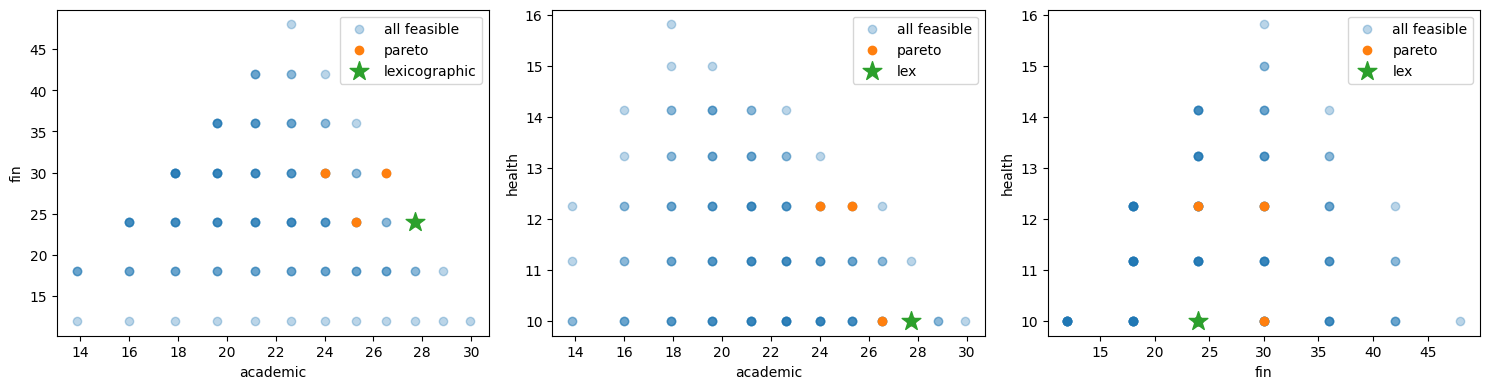

In [29]:

A_all, Fin_all, H_all = solutions[:, 3], solutions[:, 4], solutions[:, 5]
A_lex, Fin_lex, H_lex = final_lex[3], final_lex[4], final_lex[5]
A_par, Fin_par, H_par = pareto_set[:, 3], pareto_set[:, 4], pareto_set[:, 5]


plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(A_all, Fin_all, alpha=0.3, label="all feasible")
plt.scatter(A_par, Fin_par, label="pareto")
plt.scatter(A_lex, Fin_lex, marker='*', s=200, label="lexicographic")
plt.xlabel("academic")
plt.ylabel("fin")
plt.legend()

plt.subplot(132)
plt.scatter(A_all, H_all, alpha=0.3, label="all feasible")
plt.scatter(A_par, H_par, label="pareto")
plt.scatter(A_lex, H_lex, marker='*', s=200, label="lex")
plt.xlabel("academic")
plt.ylabel("health")
plt.legend()

plt.subplot(133)
plt.scatter(Fin_all, H_all, alpha=0.3, label="all feasible")
plt.scatter(Fin_par, H_par, label="pareto")
plt.scatter(Fin_lex, H_lex, marker='*', s=200, label="lex")
plt.xlabel("fin")
plt.ylabel("health")
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
print("lex solution:")
print(f"R={final_lex[0]}, J={final_lex[1]}, F={final_lex[2]} => A={final_lex[3]:.2f}, Fin={final_lex[4]:.2f}, H={final_lex[5]:.2f}")

print("\npareto solutions / eps constraint:")
for i, sol in enumerate(pareto_set):
	print(f"sol{i + 1}: R={sol[0]}, J={sol[1]}, F={sol[2]} => A={sol[3]:.2f}, Fin={sol[4]:.2f}, H={sol[5]:.2f}")


lex solution:
R=12.0, J=4.0, F=4.0 => A=27.71, Fin=24.00, H=10.00

pareto solutions / eps constraint:
sol1: R=12.0, J=4.0, F=4.0 => A=27.71, Fin=24.00, H=10.00
sol2: R=10.0, J=4.0, F=6.0 => A=25.30, Fin=24.00, H=12.25
sol3: R=11.0, J=5.0, F=4.0 => A=26.53, Fin=30.00, H=10.00
sol4: R=9.0, J=5.0, F=6.0 => A=24.00, Fin=30.00, H=12.25
